# (SQL) - Understanding movie data 🎥 

## 📖 Background
You have just been hired by a large movie studio to perform data analysis. Your manager, an executive at the company, wants to make new movies that "recapture the magic of old Hollywood." So you've decided to look at the most successful films that came out before Titanic in 1997 to identify patterns and help generate ideas that could turn into future successful films.

## 💾 The data

### You have access to the following table, _**cinema.films**_:

| Column name | Description |
|---|---|
| id | Unique movie identifier. |
| title | The title of the movie. |
| release_year | The year the movie was released to the public. |
| country | The country in which the movie was released. |
| duration | The runtime of the movie, in minutes. |
| language | The original language the movie was produced in. |
| certification | The [rating](https://simple.wikipedia.org/wiki/Motion_Picture_Association_film_rating_system) the movie was given based on their suitability for audiences. |
| gross | The revenue the movie generated at the box office, in USD. |
| budget | The available budget the production had for producing the movie, in USD. |

You can click the "Browse tables" button in the upper right-hand corner of the SQL cell below to view the available tables. They will show on the left of the notebook.

The data was sourced from [IMDb](https://www.imdb.com/).

## 💪 Challenge
Help your team leader understand the data that's available in the _cinema.films_ dataset. Include:

1. How many movies are present in the database?
2. There seems to be a lot of missing data in the gross and budget columns. How many rows have missing data? What would you recommend your manager to do with these rows?
3. How many different certifications or ratings are present in the database?
4. What are the top five countries in terms of number of movies produced?
5. What is the average duration of English versus French movies? (Don't forget you can use the AI assistant!)
6. Any other insights you found during your analysis? 

### Import Library

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Movies Data

In [28]:
films  = pd.read_csv('films.csv')

In [30]:
films.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4968 entries, 0 to 4967
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             4968 non-null   int64  
 1   title          4968 non-null   object 
 2   release_year   4926 non-null   float64
 3   country        4966 non-null   object 
 4   duration       4955 non-null   float64
 5   language       4955 non-null   object 
 6   certification  4666 non-null   object 
 7   gross          4158 non-null   float64
 8   budget         4538 non-null   float64
dtypes: float64(4), int64(1), object(4)
memory usage: 349.4+ KB


In [34]:
films.head()

,id,title,release_year,country,duration,language,certification,gross,budget
0,1,Intolerance: Love's Struggle Throughout the Ages,1916.0,USA,123.0,NaN,Not Rated,NaN,385907.0
1,2,Over the Hill to the Poorhouse,1920.0,USA,110.0,NaN,NaN,3000000.0,100000.0
2,3,The Big Parade,1925.0,USA,151.0,NaN,Not Rated,NaN,245000.0
3,4,Metropolis,1927.0,Germany,145.0,German,Not Rated,26435.0,6000000.0
4,5,Pandora's Box,1929.0,Germany,110.0,German,Not Rated,9950.0,NaN


### Analysis

1. How many movies are present in the database?
2. There seems to be a lot of missing data in the gross and budget columns. How many rows have missing data? What would you recommend your manager to do with these rows?
3. How many different certifications or ratings are present in the database?
4. What are the top five countries in terms of number of movies produced?
5. What is the average duration of English versus French movies? (Don't forget you can use the AI assistant!)
6. Any other insights you found during your analysis? 

__How many movies are present in the database?__

In [47]:
films['title'].value_counts().sum()

4968

__There seems to be a lot of missing data in the gross and budget columns. How many rows have missing data? What would you recommend your manager to do with these rows?__

In [113]:
films['gross'].isnull().sum()

810

In [115]:
films['budget'].isnull().sum()

430

not include in any analysis for movie gross and budget

__What are the top five countries in terms of number of movies produced?__

In [166]:
films['country'].value_counts().head(5)

country
USA        3750
UK          443
France      153
Canada      123
Germany      97
Name: count, dtype: int64

<Axes: xlabel='country', ylabel='count'>

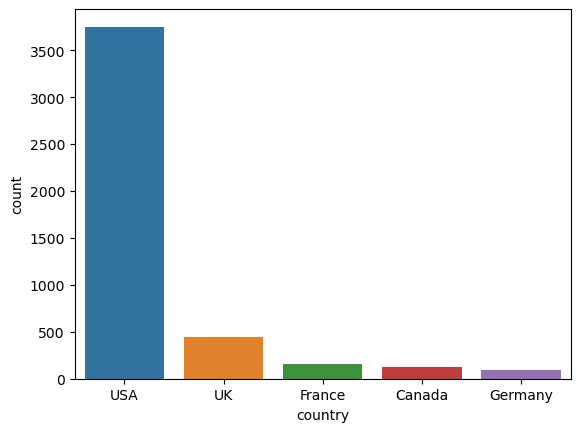

In [162]:
sns.countplot(x='country', data=films, order=films['country'].value_counts().head(5).index)

__What is the average duration of English versus French movies?__

In [183]:
dur_mean = films.groupby('language')['duration'].mean()
dur_mean[['English', 'French']]

language
English    107.636541
French     104.666667
Name: duration, dtype: float64

Text(0, 0.5, 'average duration')

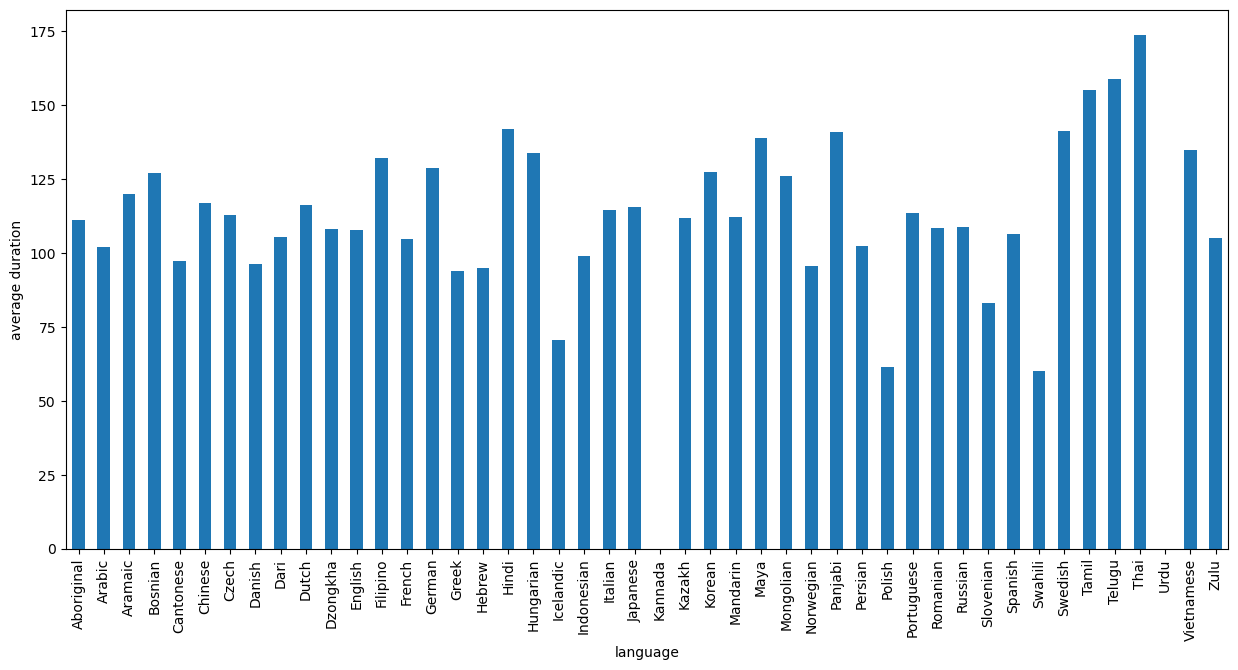

In [228]:
plt.figure(figsize=(15,7))
dur_mean.plot.bar()
plt.ylabel('average duration')

__Relationship between release year and average duration of movies__

<Axes: xlabel='release_year'>

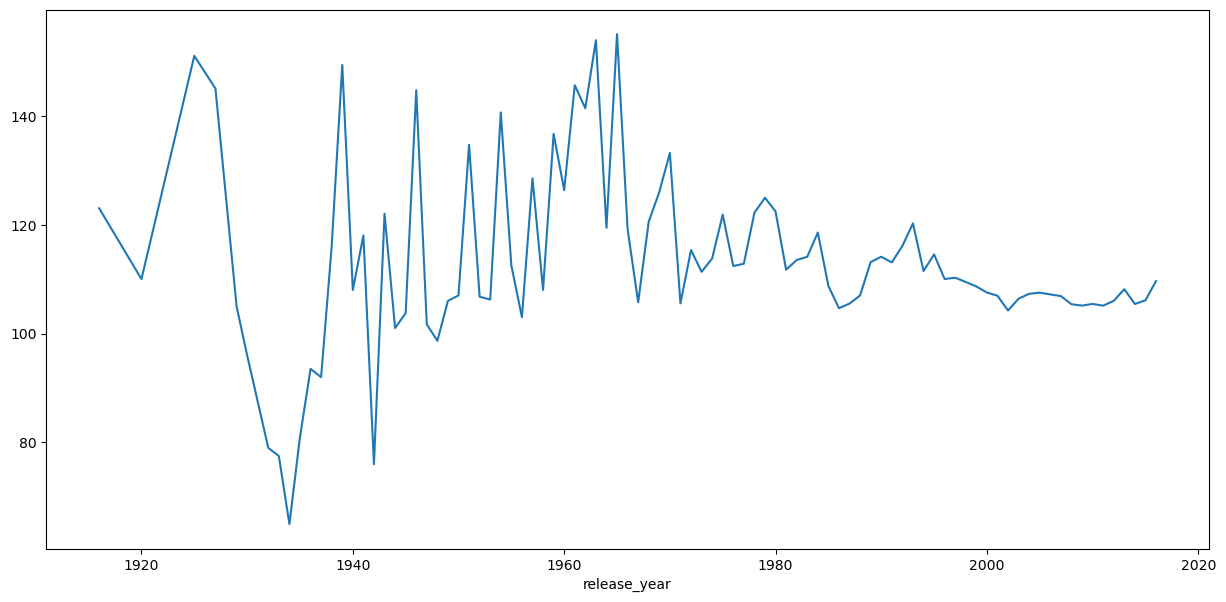

In [250]:
year_mean = films.groupby('release_year')['duration'].mean()
plt.figure(figsize =(15,7))
year_mean.plot()

Before the 70's, there are several wars, and film industries still chaotic

__What type of movie the film companies produced based on the rating?__

In [572]:
gross = films[['gross', 'budget']].dropna()
profit=gross['gross']-gross['budget']
cer_prof =pd.concat([films['certification'],profit],axis=1).dropna()
cer_prof.columns = ['certification', 'profit']

In [611]:
prof_max = cer_prof.groupby('certification').max()
prof_min = cer_prof.groupby('certification').min()
prof_avg = cer_prof.groupby('certification').mean()

In [613]:
prof_max

,profit
certification,
Approved,182925485.0
G,377783777.0
GP,36600000.0
M,96308900.0
NC-17,441829.0
Not Rated,32000000.0
PG,449935665.0
PG-13,691627416.0
Passed,19402612.0


<Axes: xlabel='certification'>

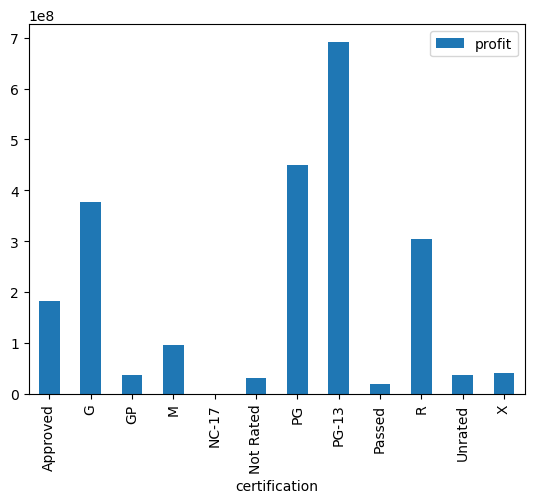

In [621]:
prof_max.plot.bar()

In [615]:
prof_min

,profit
certification,
Approved,-3.785127e+06
G,-1.643346e+08
GP,3.660000e+07
M,1.580000e+07
NC-17,-2.469704e+07
Not Rated,-4.485489e+07
PG,-9.899626e+08
PG-13,-2.397702e+09
Passed,2.429000e+06


<Axes: xlabel='certification'>

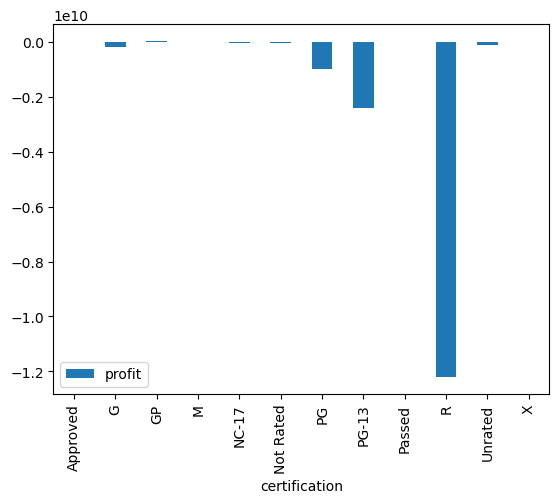

In [623]:
prof_min.plot.bar()

In [617]:
prof_avg

,profit
certification,
Approved,3.888438e+07
G,3.303720e+07
GP,3.660000e+07
M,5.605445e+07
NC-17,-4.724796e+06
Not Rated,-2.094342e+06
PG,2.264452e+07
PG-13,1.295373e+07
Passed,8.687609e+06


<Axes: xlabel='certification'>

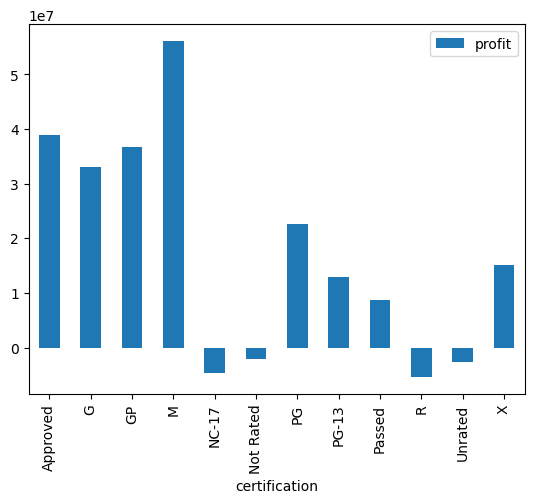

In [625]:
prof_avg.plot.bar()

__The most profitable movies__

In [664]:
profit=(films['gross']-films['budget'])
film_pro = pd.concat([films,profit], axis=1)
film_pro.drop(['gross', 'budget'], axis=1, inplace=True)
film_pro.columns = ['id', 'title', 'release_year', 'country', 'duration', 'language', 'certification', 'profit']
film_profit = film_pro.dropna()
film_profit

,id,title,release_year,country,duration,language,certification,profit
3,4,Metropolis,1927.0,Germany,145.0,German,Not Rated,-5973565.0
5,6,The Broadway Melody,1929.0,USA,100.0,English,Passed,2429000.0
8,9,42nd Street,1933.0,USA,89.0,English,Unrated,1861000.0
11,12,Top Hat,1935.0,USA,81.0,English,Approved,2391000.0
12,13,Modern Times,1936.0,USA,87.0,English,G,-1336755.0
...,...,...,...,...,...,...,...,...
4918,4919,The Young Messiah,2016.0,USA,111.0,English,PG-13,-12037424.0
4919,4920,Triple 9,2016.0,USA,115.0,English,R,-7373095.0
4921,4922,Warcraft,2016.0,USA,123.0,English,PG-13,-113021005.0
4922,4923,X-Men: Apocalypse,2016.0,USA,144.0,English,PG-13,-23014913.0


In [675]:
profitable = film_profit[film_profit['profit']>0]
film_profit[film_profit['profit']>0]['certification'].value_counts()

certification
R            875
PG-13        707
PG           360
G             53
Approved      14
Unrated       11
Not Rated      9
X              9
Passed         3
M              2
NC-17          2
GP             1
Name: count, dtype: int64